In [1]:
import pandas as pd 
import numpy as np


In [2]:
uni = pd.read_csv("Universities.csv")


In [3]:
uni.describe()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [4]:
uni.head()


,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [5]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 


In [12]:
# Considering only numerical data 
uni.data=uni
uni.data.head()


<ipython-input-12-8ba95b7e3eb2>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  uni.data=uni


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [14]:
# Normalizing the numerical data 
uni_normal = scale(uni.data)


In [15]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(uni_normal)


In [16]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [17]:
pca.components_[0]


array([-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
       -0.37940403])

In [18]:
# Cumulative variance 

var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

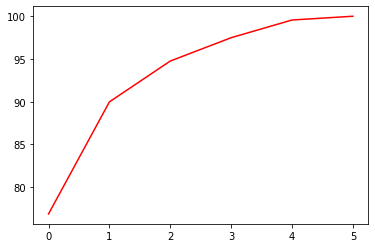

In [19]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")


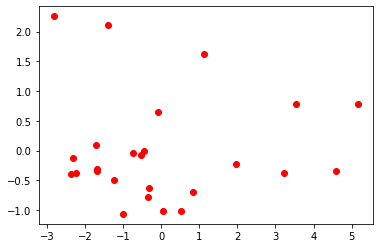

In [23]:
# plot between PCA1 and PCA2 
x = pca_values[:,0]
y = pca_values[:,1]
z = pca_values[:2:3]
plt.scatter(x,y,color=["red"])


In [24]:
################### Clustering  ##########################
new_df = pd.DataFrame(pca_values[:,0:4])


In [25]:
from sklearn.cluster import KMeans


In [26]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(new_df)

KMeans(n_clusters=3)

In [27]:
kmeans.labels_


array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 1, 0])